<a href="https://colab.research.google.com/github/ArthurSehnem/student-performance-ml/blob/main/student-performance-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Formato do dataset: (10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4.99,69.45,6.53,4.58,55.22
std,2.59,17.34,1.70,2.87,19.21
min,1.00,40.00,4.00,0.00,10.00
25%,3.00,54.00,5.00,2.00,40.00
50%,5.00,69.00,7.00,5.00,55.00
75%,7.00,85.00,8.00,7.00,71.00
max,9.00,99.00,9.00,9.00,100.00



Valores nulos por coluna:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


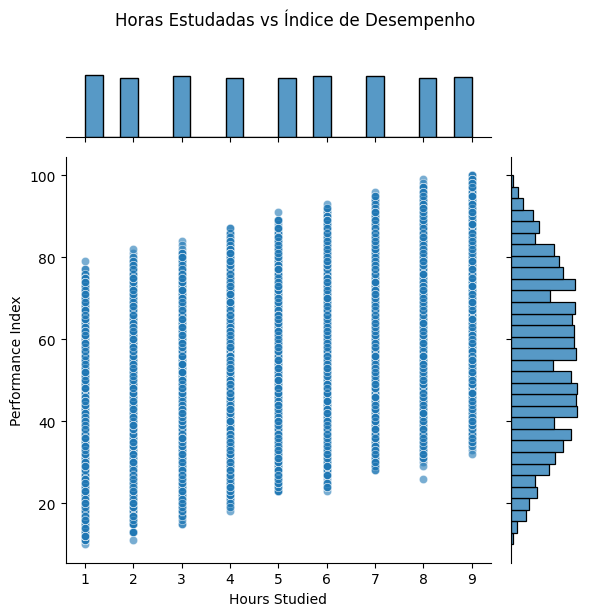

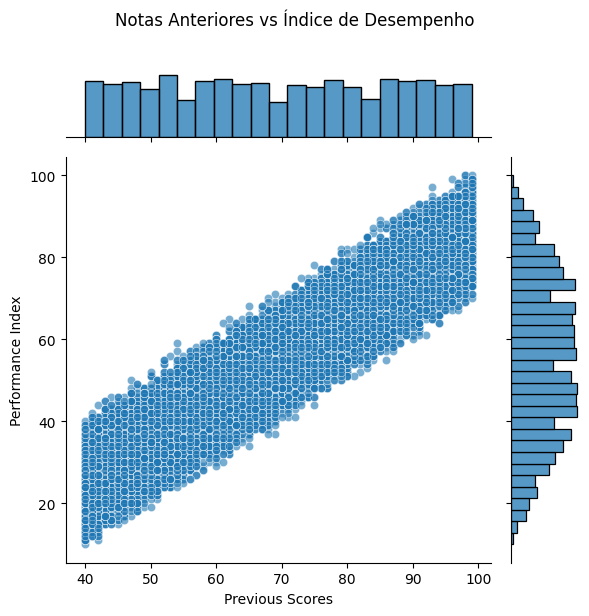

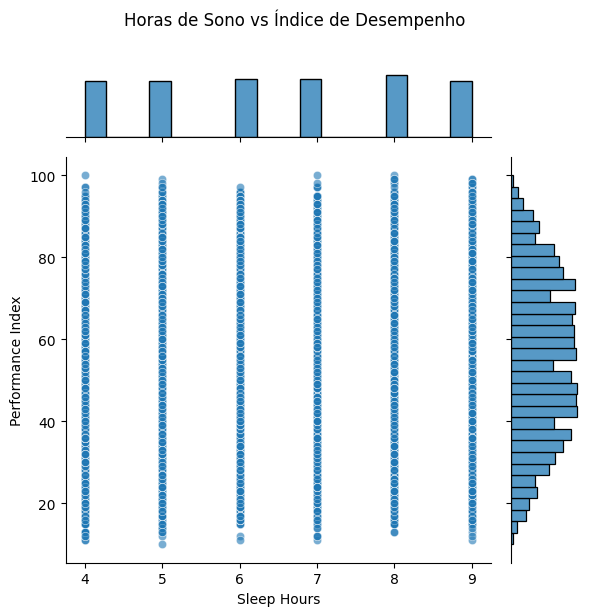

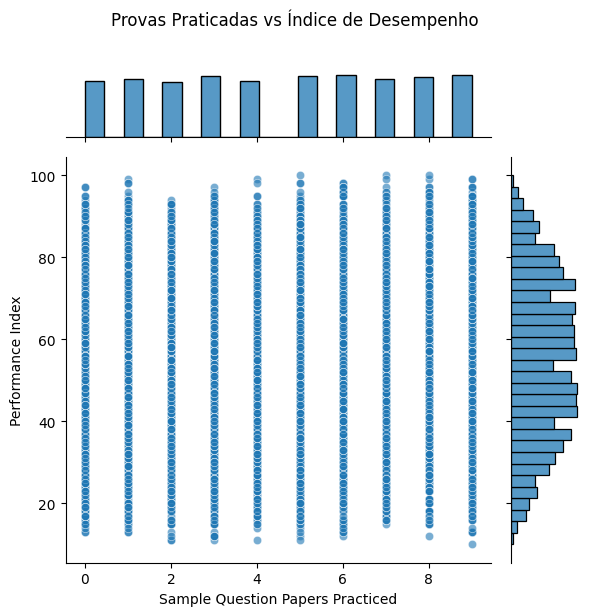

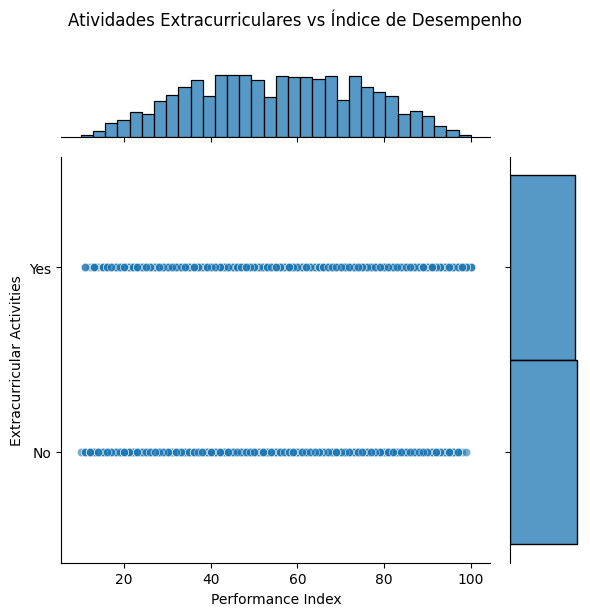

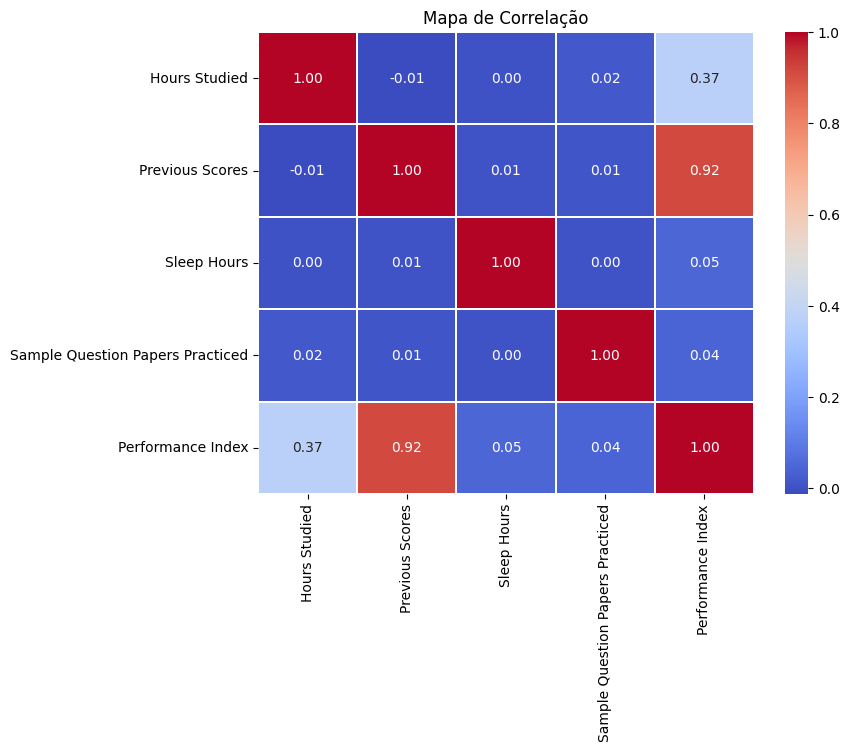


--- Avaliação do Modelo ---
Mean Squared Error (MSE): 5.24
Mean Absolute Error (MAE): 1.83
R-squared (R²): 0.99
Coeficientes: [2.85815458 1.01737155]
Intercepto: -29.67025988675899


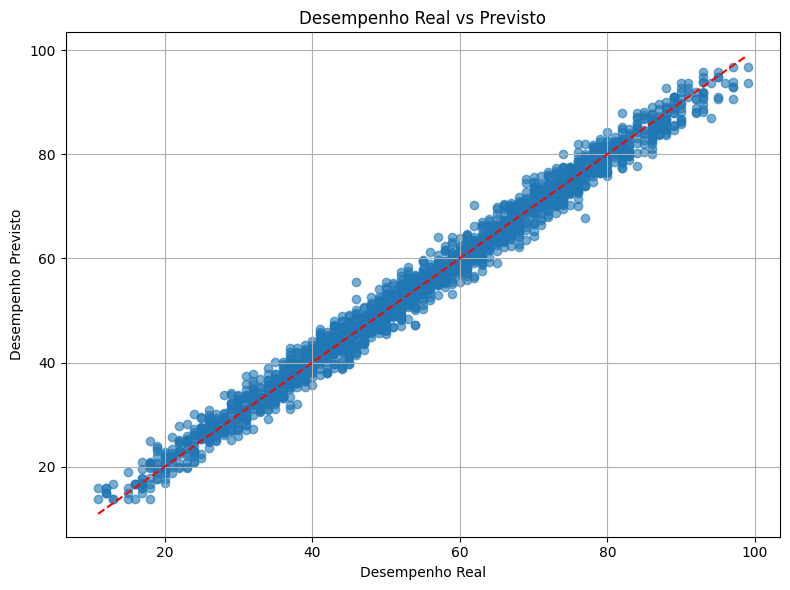


Índice de Desempenho Previsto: 19.21


In [3]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Carregamento e exploração inicial
# -----------------------------
df = pd.read_csv('Student_Performance.csv')
print(f"Formato do dataset: {df.shape}")
display(df.head())
display(df.describe().round(2))
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# -----------------------------
# Análise Exploratória Visual
# -----------------------------
def plot_joint(x, y, title):
    sns.jointplot(x=x, y=y, data=df, alpha=0.6)
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

plot_joint('Hours Studied', 'Performance Index', "Horas Estudadas vs Índice de Desempenho")
plot_joint('Previous Scores', 'Performance Index', "Notas Anteriores vs Índice de Desempenho")
plot_joint('Sleep Hours', 'Performance Index', "Horas de Sono vs Índice de Desempenho")
plot_joint('Sample Question Papers Practiced', 'Performance Index', "Provas Praticadas vs Índice de Desempenho")
plot_joint('Performance Index', 'Extracurricular Activities', "Atividades Extracurriculares vs Índice de Desempenho")

# Heatmap para ver correlações
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(exclude=object).corr(), annot=True, fmt=".2f", linewidths=0.2, cmap='coolwarm')
plt.title("Mapa de Correlação")
plt.show()

# -----------------------------
# Modelagem
# -----------------------------
# Seleção de variáveis com correlação
X = df[['Hours Studied', 'Previous Scores']]
y = df['Performance Index']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Avaliação do Modelo ---")
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

# -----------------------------
# Visualização: Real vs Previsão
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Desempenho Real')
plt.ylabel('Desempenho Previsto')
plt.title('Desempenho Real vs Previsto')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# -----------------------------
# Função para previsão personalizada
# -----------------------------
def predict_performance(hours_studied, previous_scores):
    input_data = pd.DataFrame({'Hours Studied': [hours_studied], 'Previous Scores': [previous_scores]})
    prediction = model.predict(input_data)
    return prediction[0]

# Exemplo de uso
hours_studied = 9
previous_scores = 78
predicted_performance = predict_performance(hours_studied, previous_scores)
print(f'\nÍndice de Desempenho Previsto: {predicted_performance:.2f}')


Índice de Desempenho Previsto: 75.41
